In [2]:
import os
os.chdir("F://MBA//Edwisor")

In [3]:
import pandas as pd
data = pd.read_csv("train_cab.csv")

In [ ]:
data.head(5)

In [ ]:
data.describe()

In [ ]:
data.shape

In [4]:
data['fare_amount'] = pd.to_numeric(data['fare_amount'], errors='coerce')

In [ ]:
data.head(5)

In [ ]:
data['fare_amount'][(data.fare_amount<0)].count()

In [5]:
data = data.drop(data['fare_amount'][data.fare_amount<0].index, axis=0)

In [5]:
data.columns

Index([u'fare_amount', u'pickup_datetime', u'pickup_longitude',
       u'pickup_latitude', u'dropoff_longitude', u'dropoff_latitude',
       u'passenger_count'],
      dtype='object')

# Missing value Analysis

In [6]:
import numpy as np
data.loc[data['pickup_longitude'] == 0,'pickup_longitude'] = np.nan
data.loc[data['pickup_latitude'] == 0,'pickup_latitude'] = np.nan
data.loc[data['dropoff_longitude'] == 0,'dropoff_longitude'] = np.nan
data.loc[data['dropoff_latitude'] == 0,'dropoff_latitude'] = np.nan

In [7]:
missing_val = pd.DataFrame(data.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns ={'index':'Variables', 0:'Missing_percentage'})
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(data))*100
missing_val

,Variables,Missing_percentage
0,fare_amount,0.155627
1,pickup_datetime,0.000000
2,pickup_longitude,1.960906
3,pickup_latitude,1.960906
4,dropoff_longitude,1.954681
5,dropoff_latitude,1.942231
6,passenger_count,0.342380


In [8]:
data['pickup_latitude'].loc[34]

40.740784999999995

In [ ]:
#Actual Value = 40.74078
#Mean Method = 40.71292
#Median Method = 40.75330
#KNN Imputation = 

In [9]:
data['pickup_latitude'].loc[34] = np.nan

C:\Users\Student\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
data['pickup_latitude'].loc[34]

nan

In [ ]:
#data['pickup_latitude'] = data['pickup_latitude'].fillna(data['pickup_latitude'].mean())
data['pickup_latitude'] = data['pickup_latitude'].fillna(data['pickup_latitude'].median())

In [11]:
from fancyimpute import KNN  
data = pd.DataFrame(KNN(k = 3).fit_transform(data),columns = data.columns)
#data = pd.DataFrame(KNN(k = 3).complete(data), columns = data.columns)

ModuleNotFoundError: No module named 'fancyimpute'

# Outlier Analysis

In [13]:
data.loc[data['pickup_datetime'] == 43,'pickup_datetime']= np.nan

In [14]:
data.drop(data[data.fare_amount.isnull()==True].index,axis=0, inplace=True)
data.drop(data[data.pickup_longitude.isnull()==True].index,axis=0, inplace=True)
data.drop(data[data.pickup_latitude.isnull()==True].index,axis=0, inplace=True)
data.drop(data[data.dropoff_longitude.isnull()==True].index,axis=0, inplace=True)
data.drop(data[data.dropoff_latitude.isnull()==True].index,axis=0, inplace=True)
data.drop(data[data.passenger_count.isnull()==True].index,axis=0, inplace=True)
data.drop(data[data.pickup_datetime.isnull()==True].index,axis=0, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0xcf36dd8>,
 'caps': [<matplotlib.lines.Line2D at 0xd0aef28>,
 'boxes': [<matplotlib.lines.Line2D at 0xd0ae470>],
 'medians': [<matplotlib.lines.Line2D at 0xd0c55f8>],
 'fliers': [<matplotlib.lines.Line2D at 0xd0c5940>],
 'means': []}

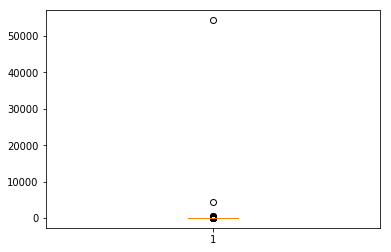

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(data['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0xd3c8fd0>,
 'caps': [<matplotlib.lines.Line2D at 0xd3d3978>,
 'boxes': [<matplotlib.lines.Line2D at 0xd3c8e80>],
 'medians': [<matplotlib.lines.Line2D at 0xd3d3da0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd3dc390>],
 'means': []}

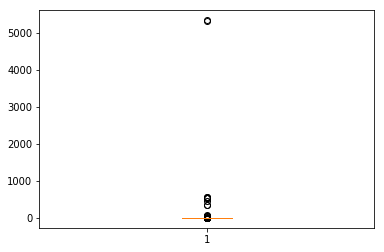

In [16]:
plt.boxplot(data['passenger_count'])

In [17]:
numeric = ["fare_amount", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]

In [18]:
for i in numeric:
    print(i)
    q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    data = data.drop(data[data.loc[:,i] < min].index)
    data = data.drop(data[data.loc[:,i] > max].index)

fare_amount
-3.75
22.25
pickup_longitude
-74.02678399999999
-73.935688
pickup_latitude
40.693391500000004
40.81095549999999
dropoff_longitude
-74.02568549999998
-73.93545750000001
dropoff_latitude
40.694137874999996
40.81141087500001


In [19]:
data.shape

(13210, 7)

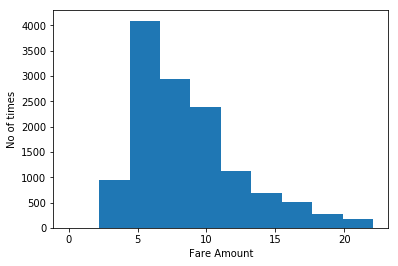

In [71]:
plt.hist(data['fare_amount'], bins = 10)
plt.ylabel('No of times')
plt.xlabel('Fare Amount')
plt.show()

In [ ]:
plt.hist(data['passenger_count'], bins = 5)
plt.ylabel('No of times')
plt.xlabel('Passenger Count')
plt.show()

In [ ]:
plt.hist(data['pickup_latitude'], bins = 5)
plt.ylabel('No of times')
plt.xlabel('Pickup Latitude')
plt.show()

# Feature Selection

In [20]:
data['Date'] = pd.to_datetime(data['pickup_datetime'], errors='coerce')
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['wday'] = data['Date'].dt.dayofweek
data['hour'] = data['Date'].dt.hour
data['minute'] = data['Date'].dt.minute

In [21]:
from math import radians, cos, sin, asin, sqrt
def distance(a):
    plg=a[0]
    plt=a[1]
    dlg=a[2]
    dlt=a[3]
     
    plg, plt, dlg, dlt = map(radians, [plg, plt, dlg, dlt])
    
    ddlg = dlg - plg 
    ddlt = dlt - plt 
    a = sin(ddlt/2)**2 + cos(plg) * cos(dlt) * sin(ddlg/2)**2
    c =  2 * asin(sqrt(a)) 
   
    km = 6371* c
    return km

In [22]:
data['distance']=data[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(distance,axis=1)

In [23]:
data=data.drop('pickup_longitude', axis=1)
data=data.drop('pickup_latitude', axis=1)
data=data.drop('dropoff_longitude', axis=1)
data=data.drop('dropoff_latitude', axis=1)
data=data.drop('pickup_datetime', axis=1)
data=data.drop('Date', axis=1)

In [24]:
data.shape

(13210, 9)

In [25]:
data.dtypes

fare_amount        float64
passenger_count    float64
year               float64
month              float64
day                float64
wday               float64
hour               float64
minute             float64
distance           float64
dtype: object

# Creating Dummies

In [26]:
data['passenger_count'] = pd.to_numeric(data['passenger_count'],errors='coerce')

In [27]:
data = data.drop(data['passenger_count'][data.passenger_count>6].index, axis=0)

In [28]:
data = data.drop(data['passenger_count'][data.passenger_count<1].index, axis=0)

In [29]:
data['passenger_count'] = data['passenger_count'].astype(object)
data['passenger_count'].unique()

array([1.0, 2.0, 3.0, 6.0, 5.0, 4.0], dtype=object)

In [30]:
for i in range(0,data.shape[0]):
        if(data.iloc[i,6]<5):
            data.iloc[i, 6] = "EarlyMorning"
        elif(5 < data.iloc[i, 6] < 10):
            data.iloc[i, 6] = "Morning"
        elif(10 < data.iloc[i, 6] < 17):
            data.iloc[i, 6] = "Daytime"
        elif(17 < data.iloc[i,6] < 20):
            data.iloc[i, 6] = "Night"
        else:
            data.iloc[i, 6] = "LateNight"

In [31]:
data['hour']. unique()

array(['Daytime', 'EarlyMorning', 'Morning', 'LateNight', 'Night'],
      dtype=object)

In [32]:
data['hour'] = data['hour'].astype(object)

In [33]:
data['year'] = data['year'].astype(object)
data['month'] = data['month'].astype(object)
data['wday'] = data['wday'].astype(object)

In [34]:
data.dtypes

fare_amount        float64
passenger_count     object
year                object
month               object
day                float64
wday                object
hour                object
minute             float64
distance           float64
dtype: object

In [35]:
factor_variables = ["year", "hour", "month", "passenger_count"]

for i in factor_variables:
    temp = pd.get_dummies(data[i], prefix = i)
    data_train = data.join(temp)

In [36]:
t = pd.get_dummies(data['year'], prefix = "year")

In [37]:
data_train = data_train.join(t)

In [38]:
h = pd.get_dummies(data['hour'], prefix = "hour")
data_train = data_train.join(h)

In [39]:
m = pd.get_dummies(data['month'], prefix = "month")
data_train = data_train.join(m)

In [40]:
data_train.columns

Index(['fare_amount', 'passenger_count', 'year', 'month', 'day', 'wday',
       'hour', 'minute', 'distance', 'passenger_count_1.0',
       'passenger_count_2.0', 'passenger_count_3.0', 'passenger_count_4.0',
       'passenger_count_5.0', 'passenger_count_6.0', 'year_2009.0',
       'year_2010.0', 'year_2011.0', 'year_2012.0', 'year_2013.0',
       'year_2014.0', 'year_2015.0', 'hour_Daytime', 'hour_EarlyMorning',
       'hour_LateNight', 'hour_Morning', 'hour_Night', 'month_1.0',
       'month_2.0', 'month_3.0', 'month_4.0', 'month_5.0', 'month_6.0',
       'month_7.0', 'month_8.0', 'month_9.0', 'month_10.0', 'month_11.0',
       'month_12.0'],
      dtype='object')

In [41]:
data_train = data_train.drop('passenger_count', axis=1)
data_train = data_train.drop('year', axis=1)
data_train = data_train.drop('month', axis=1)
data_train = data_train.drop('day', axis=1)
data_train = data_train.drop('wday', axis=1)
data_train = data_train.drop('hour', axis=1)
data_train = data_train.drop('minute', axis=1)

In [42]:
data_train.shape

(13143, 32)

In [43]:
data_train.columns

Index(['fare_amount', 'distance', 'passenger_count_1.0', 'passenger_count_2.0',
       'passenger_count_3.0', 'passenger_count_4.0', 'passenger_count_5.0',
       'passenger_count_6.0', 'year_2009.0', 'year_2010.0', 'year_2011.0',
       'year_2012.0', 'year_2013.0', 'year_2014.0', 'year_2015.0',
       'hour_Daytime', 'hour_EarlyMorning', 'hour_LateNight', 'hour_Morning',
       'hour_Night', 'month_1.0', 'month_2.0', 'month_3.0', 'month_4.0',
       'month_5.0', 'month_6.0', 'month_7.0', 'month_8.0', 'month_9.0',
       'month_10.0', 'month_11.0', 'month_12.0'],
      dtype='object')

# Exploratory Data Analysis

Text(0, 0.5, 'fare_amount')

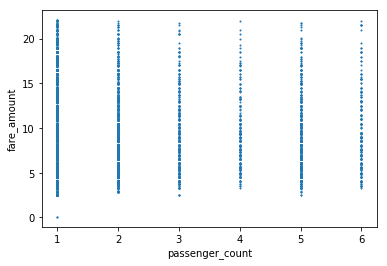

In [44]:
plt.scatter(x=data['passenger_count'], y=data['fare_amount'], s=1)
plt.xlabel('passenger_count')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

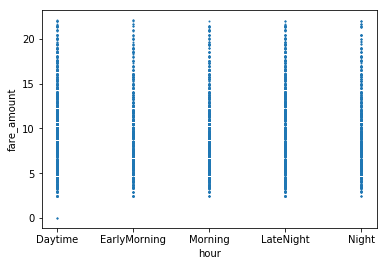

In [45]:
plt.scatter(x=data['hour'], y=data['fare_amount'], s=1)
plt.xlabel('hour')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

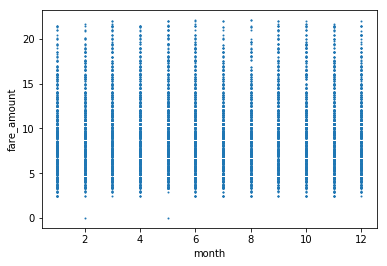

In [46]:
plt.scatter(x=data['month'], y=data['fare_amount'], s=1)
plt.xlabel('month')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

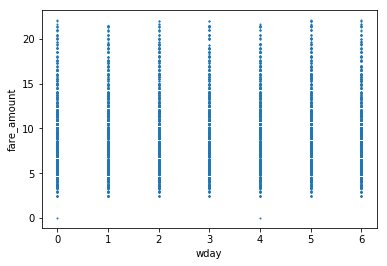

In [47]:
plt.scatter(x=data['wday'], y=data['fare_amount'], s=1)
plt.xlabel('wday')
plt.ylabel('fare_amount')

Text(0, 0.5, 'fare_amount')

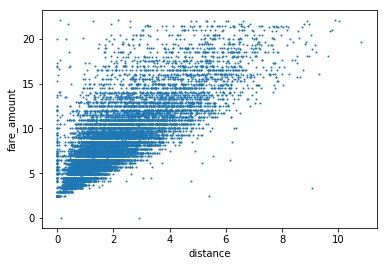

In [48]:
plt.scatter(x=data['distance'], y=data['fare_amount'], s=1)
plt.xlabel('distance')
plt.ylabel('fare_amount')

# Sampling

In [49]:
!pip install sklearn.model_selection
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_train, test_size = 0.25, random_state = 35)

  Could not find a version that satisfies the requirement sklearn.model_selection (from versions: )
No matching distribution found for sklearn.model_selection


In [50]:
len(train)

9857

# Model Development

In [51]:
import statsmodels.api as sm

model = sm.OLS(train.iloc[:,0], train.iloc[:,1:31]).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     676.6
Date:                Fri, 21 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:30:10   Log-Likelihood:                -21889.
No. Observations:                9857   AIC:                         4.384e+04
Df Residuals:                    9828   BIC:                         4.404e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
distance                2.0199      0.015    134.028      0.000       1.990       2.049
passenger_count_1.0     2.0663      1.016      2.034      0.042       0.075       4.057
passenger_count_2.0     2.1241      1.017      2.088      0.037       0.130       4.118
passenger_count_3.0     2.2588      1.020      2.213      0.027       0.258       4.259
passenger_count_4.0     2.2306      1.026      2.174      0.030       0.219       4.242
passenger_count_5.0     2.1086      1.019      2.070      0.038       0.112       4.105
passenger_count_6.0     2.2525      1.026      2.195      0.028       0.241       4.264
year_2009.0            -0.7731      2.235     -0.346      0.729      -5.154       3.608
year_2010.0            -0.8376      2.235     -0.375      0.708      -5.219       3.544
year_2011.0            -0.7373      2.235     -0.330      0.741      -5.119       3.644
year_2012.0            -0.1961      2.235     -0.088      0.930      -4.577       4.185
year_2013.0             0.5979      2.235      0.268      0.789      -3.783       4.979
year_2014.0             0.8490      2.235      0.380      0.704      -3.533       5.230
year_2015.0             1.0325      2.236      0.462      0.644      -3.351       5.416
hour_Daytime            2.9944      1.219      2.456      0.014       0.604       5.384
hour_EarlyMorning       2.1626      1.221      1.772      0.076      -0.230       4.555
hour_LateNight          2.4373      1.219      2.000      0.046       0.049       4.826
hour_Morning            2.6492      1.220      2.172      0.030       0.258       5.040
hour_Night              2.7974      1.220      2.293      0.022       0.406       5.189
month_1.0              -0.5485      0.110     -4.973      0.000      -0.765      -0.332
month_2.0              -0.4104      0.113     -3.630      0.000      -0.632      -0.189
month_3.0              -0.3810      0.110     -3.454      0.001      -0.597      -0.165
month_4.0              -0.3571      0.111     -3.206      0.001      -0.575      -0.139
month_5.0              -0.0833      0.110     -0.757      0.449      -0.299       0.133
month_6.0              -0.1603      0.110     -1.457      0.145      -0.376       0.055
month_7.0              -0.2055      0.116     -1.772      0.076      -0.433       0.022
month_8.0              -0.3503      0.118     -2.965      0.003      -0.582      -0.119
month_9.0               0.0103      0.116      0.089      0.929      -0.217       0.238
month_10.0              0.0981      0.114      0.859      0.391      -0.126       0.322
month_11.0              0.1057      0.115      0.923      0.356      -0.119       0.330
==============================================================================
Omnibus:                     2751.066   Durbin-Watson:                   2.004
Prob(Omnibus):       

In [53]:
test.shape

(3286, 32)

In [54]:
test['pred'] = model.predict(test.iloc[:,1:31]) 

C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
test['pred'].head(5)

14258    12.125248
11219     7.871284
14673    10.846136
14462    11.906947
1716      6.111009
Name: pred, dtype: float64

In [56]:
def MAPE(y_act, y_pred): 
    mape = np.mean(np.abs((y_act - y_pred) / y_act))*100
    return mape
MAPE(test.iloc[:,0], test['pred'])

21.26936717655406

In [57]:
def MAE(y_act, y_pred): 
    mae = np.mean(np.abs(y_act - y_pred))
    return mae
MAE(test.iloc[:,0], test['pred'])

1.6964490759696795

In [58]:
def MSE(y_act, y_pred): 
    mse = np.mean(np.square(y_act - y_pred))
    return mse
MSE(test.iloc[:,0], test['pred'])

5.4089519203102

In [59]:
def RMSE(y_act, y_pred): 
    rmse = np.sqrt(np.mean(np.square(y_act - y_pred)))
    return rmse
RMSE(test.iloc[:,0], test['pred'])

2.325715356682799

In [60]:
#Error Metrics
#MAPE = 21.2694%
#MAE = 1.6964
#MSE = 5.4089
#RMSE = 2.2357

# Predicting the Unseen Values

In [ ]:
data_test = pd.read_csv("test.csv")

In [ ]:
data_test['Date'] = pd.to_datetime(data_test['pickup_datetime'], errors='coerce')
data_test['year'] = data_test['Date'].dt.year
data_test['month'] = data_test['Date'].dt.month
data_test['day'] = data_test['Date'].dt.day
data_test['wday'] = data_test['Date'].dt.dayofweek
data_test['hour'] = data_test['Date'].dt.hour
data_test['minute'] = data_test['Date'].dt.minute

In [ ]:
data_test['distance']=data_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(distance,axis=1)

In [ ]:
data_test=data_test.drop('pickup_longitude', axis=1)
data_test=data_test.drop('pickup_latitude', axis=1)
data_test=data_test.drop('dropoff_longitude', axis=1)
data_test=data_test.drop('dropoff_latitude', axis=1)
data_test=data_test.drop('pickup_datetime', axis=1)
data_test=data_test.drop('Date', axis=1)

In [ ]:
data_test['passenger_count'] = pd.to_numeric(data_test['passenger_count'],errors='coerce')

In [ ]:
data_test['passenger_count'] = data_test['passenger_count'].astype(object)

In [ ]:
data_test.columns

In [ ]:
for i in range(0,data_test.shape[0]):
        if(data_test.iloc[i,5]<5):
            data_test.iloc[i, 5] = "EarlyMorning"
        elif(5 < data_test.iloc[i, 5] < 10):
            data_test.iloc[i, 5] = "Morning"
        elif(10 < data_test.iloc[i, 5] < 17):
            data_test.iloc[i, 5] = "Daytime"
        elif(17 < data_test.iloc[i,5] < 20):
            data_test.iloc[i, 5] = "Night"
        else:
            data_test.iloc[i, 5] = "LateNight"

In [ ]:
data_test['hour'] = data_test['hour'].astype(object)
data_test['year'] = data_test['year'].astype(object)
data_test['month'] = data_test['month'].astype(object)
data_test['wday'] = data_test['wday'].astype(object)

In [ ]:
factor_variables = ["year", "hour", "month", "passenger_count"]

for i in factor_variables:
    temp = pd.get_dummies(data_test[i], prefix = i)
    data_test = data_test.join(temp)

In [ ]:
data_test = data_test.drop('passenger_count', axis=1)
data_test = data_test.drop('year', axis=1)
data_test = data_test.drop('month', axis=1)
data_test = data_test.drop('day', axis=1)
data_test = data_test.drop('wday', axis=1)
data_test = data_test.drop('hour', axis=1)
data_test = data_test.drop('minute', axis=1)

In [ ]:
data_test.shape

In [ ]:
data_test['pred'] = model.predict(data_test.iloc[:,0:30]) 

In [ ]:
data_test.head(10)